Model: `albert-xlarge-v2`

Dataset: squadv1

HPs: wu=100, lr=3e5, bs=32, msl=384

Performance by checkpoint for the following categories:
1. WWWWWWH
2. Answerable vs Unanswerable
3. Answer length
4. Context length
5. Question length

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('../..')

In [3]:
BATCH_SIZE = 32

## WWWWWWH

In [4]:
metrics_by_cat = pd.DataFrame()

seeds = [28, 29, 30]
filepaths=[
    'data/processed/metrics_by_w6h-albert-xlarge-v2-squadv1-wu=100-lr=3e5-bs=32-msl=384-seed=28.csv',
    'data/processed/metrics_by_w6h-albert-xlarge-v2-squadv1-wu=100-lr=3e5-bs=32-msl=384-seed=29.csv',
    'data/processed/metrics_by_w6h-albert-xlarge-v2-squadv1-wu=100-lr=3e5-bs=32-msl=384-seed=30.csv'
]

for seed, fp in zip(seeds, filepaths):
    df = pd.read_csv(fp)
    df['seed'] = seed
    metrics_by_cat = metrics_by_cat.append(df)
    
metrics_by_cat['num_examples'] = metrics_by_cat['checkpoint'] * BATCH_SIZE

In [5]:
print(metrics_by_cat.shape)
metrics_by_cat.head()

(2880, 16)


,exact,f1,total,HasAns_exact,HasAns_f1,HasAns_total,best_exact,best_exact_thresh,best_f1,best_f1_thresh,w6h_label,checkpoint,overall_f1,overall_exact,seed,num_examples
0,0.000000,3.836275,454,0.000000,3.836275,454,0.000000,0.0,3.836275,0.0,which,1,4.923171,0.094607,28,32
1,0.000000,7.667560,433,0.000000,7.667560,433,0.000000,0.0,7.667560,0.0,where,1,4.923171,0.094607,28,32
2,0.000000,5.189379,4749,0.000000,5.189379,4749,0.000000,0.0,5.189379,0.0,what,1,4.923171,0.094607,28,32
3,0.188857,3.881103,1059,0.188857,3.881103,1059,0.188857,0.0,3.881103,0.0,who,1,4.923171,0.094607,28,32
4,0.206398,4.678877,1938,0.206398,4.678877,1938,0.206398,0.0,4.678877,0.0,other,1,4.923171,0.094607,28,32


### Full checkpoints

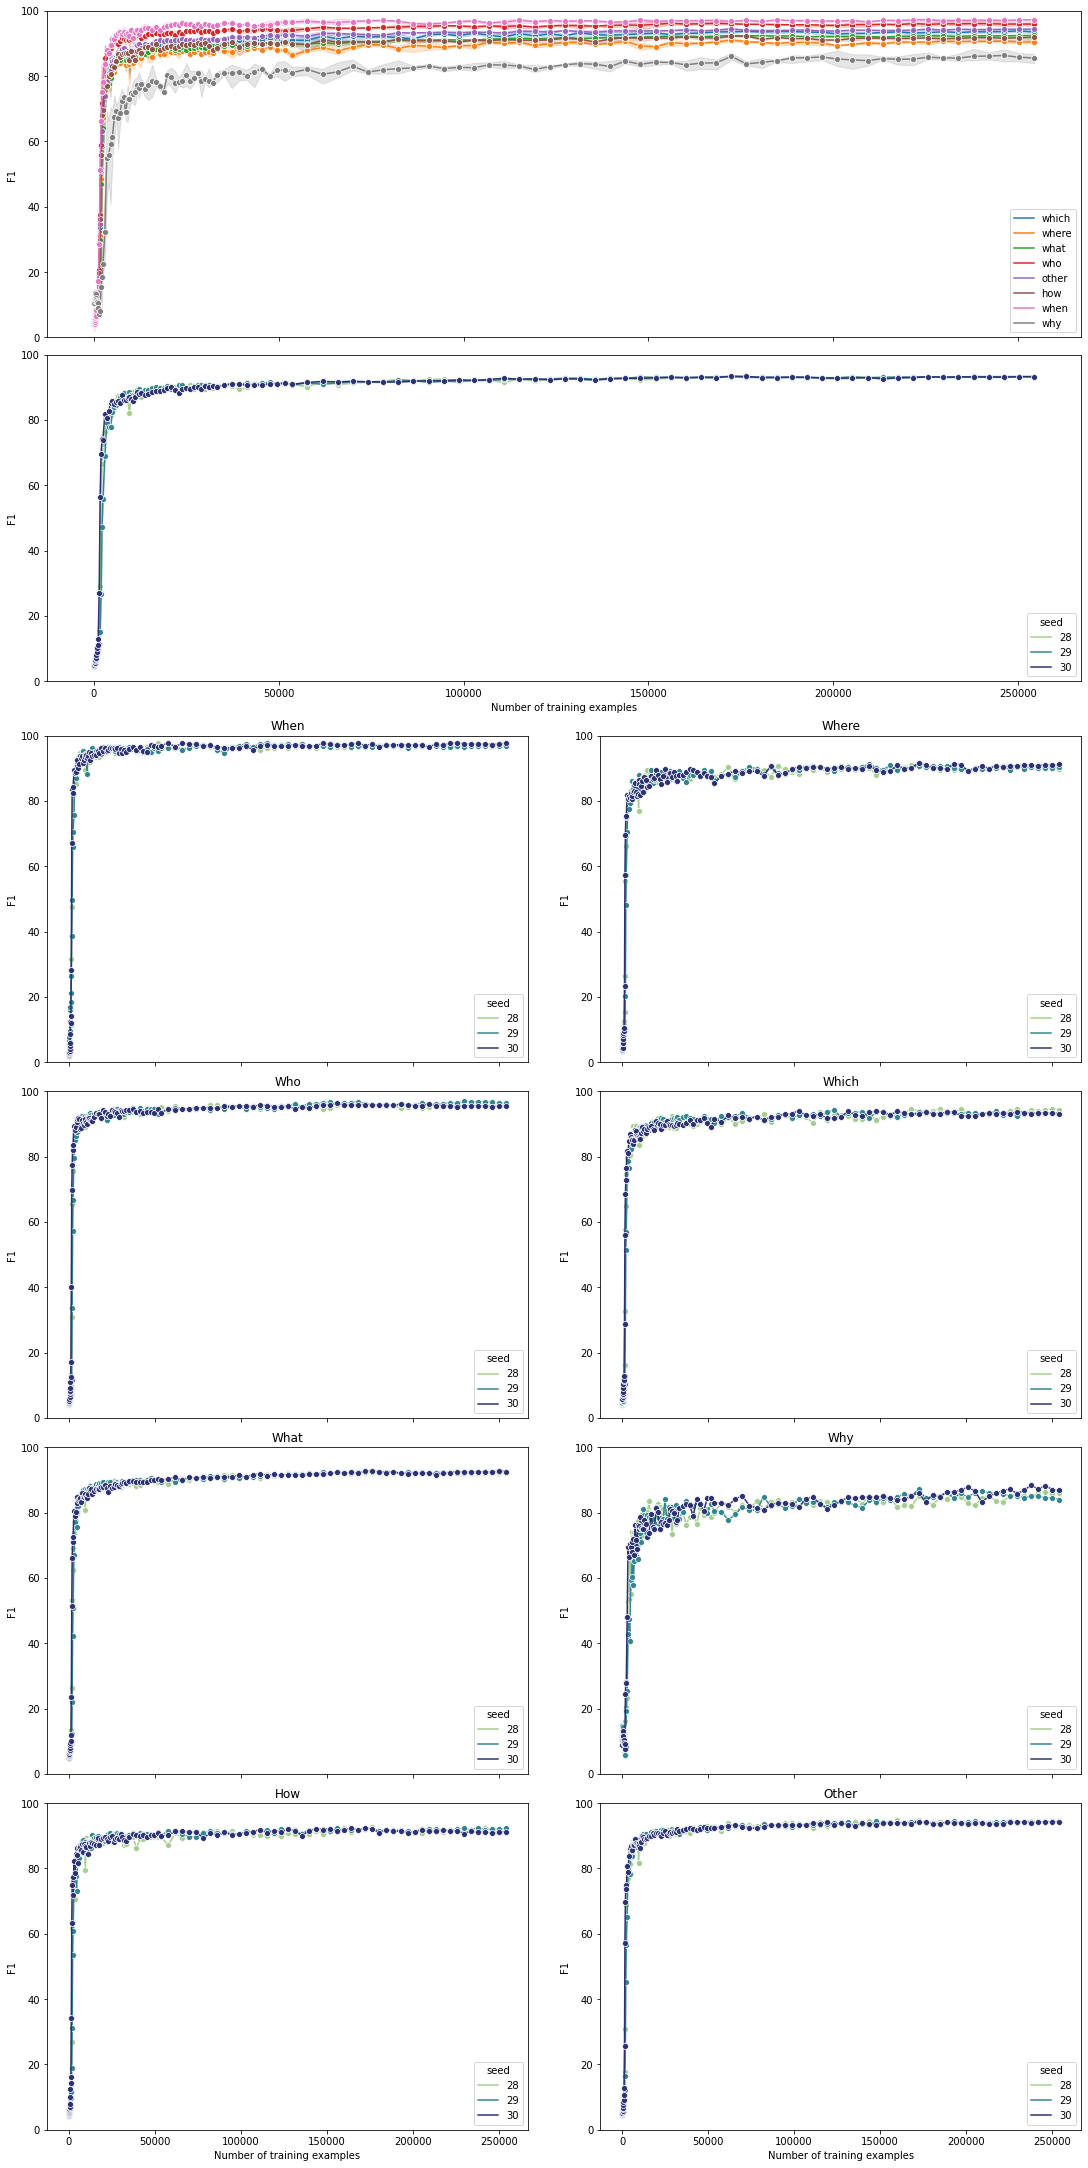

In [6]:
fig = plt.figure(constrained_layout=True, figsize=(15, 30))
gs = fig.add_gridspec(6, 2)

# Overall (all examples) by seed
ax2 = fig.add_subplot(gs[1, :])
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('F1')
ax2.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='overall_f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax2)
ax2.legend(title='seed', loc='lower right')

# By category
ax1 = fig.add_subplot(gs[0, :], sharex=ax2, sharey=ax2)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('F1')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='f1', x='num_examples', hue='w6h_label', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

# 'How' by seed
ax9 = fig.add_subplot(gs[5, 0])
ax9.set_xlabel('Number of training examples')
ax9.set_ylabel('F1')
ax9.set_title('How')
ax9.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['w6h_label'] == 'how'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax9)
ax9.legend(title='seed', loc='lower right')

# 'When' by seed
ax3 = fig.add_subplot(gs[2, 0], sharex=ax9, sharey=ax9)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.set_ylabel('F1')
ax3.set_title('When')
ax3.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['w6h_label'] == 'when'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax3)
ax3.legend(title='seed', loc='lower right')

# 'Who' by seed
ax5 = fig.add_subplot(gs[3, 0], sharex=ax9, sharey=ax9)
plt.setp(ax5.get_xticklabels(), visible=False)
ax5.set_ylabel('F1')
ax5.set_title('Who')
ax5.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['w6h_label'] == 'who'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax5)
ax5.legend(title='seed', loc='lower right')

# 'What' by seed
ax7 = fig.add_subplot(gs[4, 0], sharex=ax9, sharey=ax9)
plt.setp(ax7.get_xticklabels(), visible=False)
ax7.set_ylabel('F1')
ax7.set_title('What')
ax7.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['w6h_label'] == 'what'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax7)
ax7.legend(title='seed', loc='lower right')

# 'Other' by seed
ax10 = fig.add_subplot(gs[5, 1])
ax10.set_xlabel('Number of training examples')
ax10.set_ylabel('F1')
ax10.set_title('Other')
ax10.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['w6h_label'] == 'other'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax10)
ax10.legend(title='seed', loc='lower right')

# 'Where' by seed
ax4 = fig.add_subplot(gs[2, 1], sharex=ax10, sharey=ax10)
plt.setp(ax4.get_xticklabels(), visible=False)
ax4.set_ylabel('F1')
ax4.set_title('Where')
ax4.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['w6h_label'] == 'where'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax4)
ax4.legend(title='seed', loc='lower right')

# 'Which' by seed
ax6 = fig.add_subplot(gs[3, 1], sharex=ax10, sharey=ax10)
plt.setp(ax6.get_xticklabels(), visible=False)
ax6.set_ylabel('F1')
ax6.set_title('Which')
ax6.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['w6h_label'] == 'which'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax6)
ax6.legend(title='seed', loc='lower right')

# 'Why' by seed
ax8 = fig.add_subplot(gs[4, 1], sharex=ax10, sharey=ax10)
plt.setp(ax8.get_xticklabels(), visible=False)
ax8.set_ylabel('F1')
ax8.set_title('Why')
ax8.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['w6h_label'] == 'why'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax8)
ax8.legend(title='seed', loc='lower right')

plt.show()

### Initial checkpoints

In [7]:
metrics_by_cat_subset = metrics_by_cat[metrics_by_cat['num_examples'] < 1500]

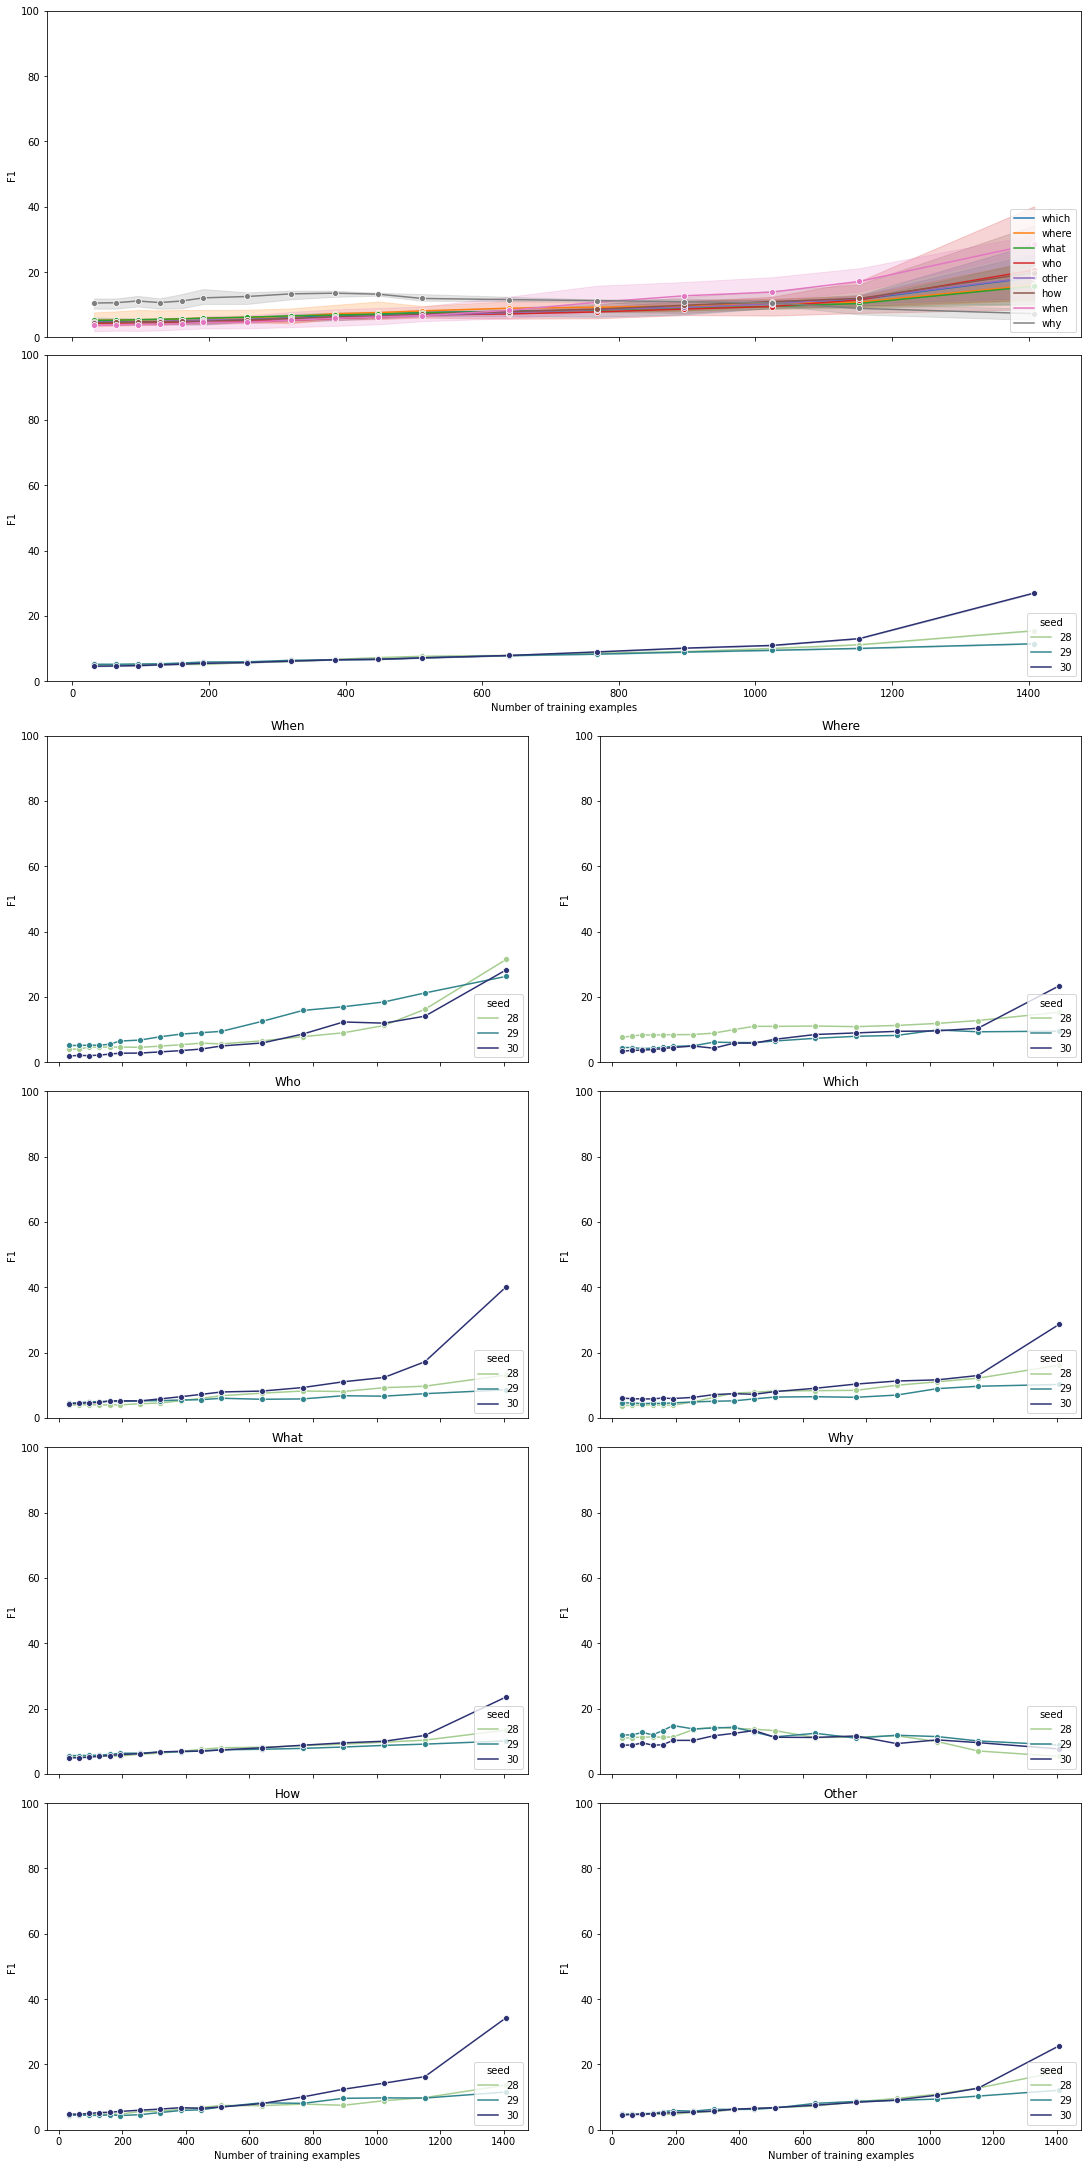

In [8]:
fig = plt.figure(constrained_layout=True, figsize=(15, 30))
gs = fig.add_gridspec(6, 2)

# Overall (all examples) by seed
ax2 = fig.add_subplot(gs[1, :])
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('F1')
ax2.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='overall_f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax2)
ax2.legend(title='seed', loc='lower right')

# By category
ax1 = fig.add_subplot(gs[0, :], sharex=ax2, sharey=ax2)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('F1')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='f1', x='num_examples', hue='w6h_label', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

# 'How' by seed
ax9 = fig.add_subplot(gs[5, 0])
ax9.set_xlabel('Number of training examples')
ax9.set_ylabel('F1')
ax9.set_title('How')
ax9.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['w6h_label'] == 'how'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax9)
ax9.legend(title='seed', loc='lower right')

# 'When' by seed
ax3 = fig.add_subplot(gs[2, 0], sharex=ax9, sharey=ax9)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.set_ylabel('F1')
ax3.set_title('When')
ax3.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['w6h_label'] == 'when'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax3)
ax3.legend(title='seed', loc='lower right')

# 'Who' by seed
ax5 = fig.add_subplot(gs[3, 0], sharex=ax9, sharey=ax9)
plt.setp(ax5.get_xticklabels(), visible=False)
ax5.set_ylabel('F1')
ax5.set_title('Who')
ax5.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['w6h_label'] == 'who'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax5)
ax5.legend(title='seed', loc='lower right')

# 'What' by seed
ax7 = fig.add_subplot(gs[4, 0], sharex=ax9, sharey=ax9)
plt.setp(ax7.get_xticklabels(), visible=False)
ax7.set_ylabel('F1')
ax7.set_title('What')
ax7.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['w6h_label'] == 'what'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax7)
ax7.legend(title='seed', loc='lower right')

# 'Other' by seed
ax10 = fig.add_subplot(gs[5, 1])
ax10.set_xlabel('Number of training examples')
ax10.set_ylabel('F1')
ax10.set_title('Other')
ax10.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['w6h_label'] == 'other'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax10)
ax10.legend(title='seed', loc='lower right')

# 'Where' by seed
ax4 = fig.add_subplot(gs[2, 1], sharex=ax10, sharey=ax10)
plt.setp(ax4.get_xticklabels(), visible=False)
ax4.set_ylabel('F1')
ax4.set_title('Where')
ax4.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['w6h_label'] == 'where'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax4)
ax4.legend(title='seed', loc='lower right')

# 'Which' by seed
ax6 = fig.add_subplot(gs[3, 1], sharex=ax10, sharey=ax10)
plt.setp(ax6.get_xticklabels(), visible=False)
ax6.set_ylabel('F1')
ax6.set_title('Which')
ax6.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['w6h_label'] == 'which'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax6)
ax6.legend(title='seed', loc='lower right')

# 'Why' by seed
ax8 = fig.add_subplot(gs[4, 1], sharex=ax10, sharey=ax10)
plt.setp(ax8.get_xticklabels(), visible=False)
ax8.set_ylabel('F1')
ax8.set_title('Why')
ax8.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['w6h_label'] == 'why'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax8)
ax8.legend(title='seed', loc='lower right')

plt.show()

## Answer length

In [9]:
metrics_by_cat = pd.DataFrame()

seeds = [28, 29, 30]
filepaths=[
    'data/processed/metrics_by_answer_mode_length_bin-albert-xlarge-v2-squadv1-wu=100-lr=3e5-bs=32-msl=384-seed=28.csv',
    'data/processed/metrics_by_answer_mode_length_bin-albert-xlarge-v2-squadv1-wu=100-lr=3e5-bs=32-msl=384-seed=29.csv',
    'data/processed/metrics_by_answer_mode_length_bin-albert-xlarge-v2-squadv1-wu=100-lr=3e5-bs=32-msl=384-seed=30.csv'
]

for seed, fp in zip(seeds, filepaths):
    df = pd.read_csv(fp)
    df['seed'] = seed
    metrics_by_cat = metrics_by_cat.append(df)
    
metrics_by_cat['num_examples'] = metrics_by_cat['checkpoint'] * BATCH_SIZE

In [10]:
metrics_by_cat['answer_mode_length_bin'].unique()

array(['2', '1', '3', '4', '6', '>9', '5', '9', '7', '8'], dtype=object)

In [11]:
print(metrics_by_cat.shape)
metrics_by_cat.head()

(3600, 16)


,exact,f1,total,HasAns_exact,HasAns_f1,HasAns_total,best_exact,best_exact_thresh,best_f1,best_f1_thresh,answer_mode_length_bin,checkpoint,overall_f1,overall_exact,seed,num_examples
0,0.173913,4.375802,2875,0.173913,4.375802,2875,0.173913,0.0,4.375802,0.0,2,1,4.923171,0.094607,28,32
1,0.073656,2.914829,4073,0.073656,2.914829,4073,0.073656,0.0,2.914829,0.0,1,1,4.923171,0.094607,28,32
2,0.063131,5.631175,1584,0.063131,5.631175,1584,0.063131,0.0,5.631175,0.0,3,1,4.923171,0.094607,28,32
3,0.000000,7.529063,731,0.000000,7.529063,731,0.000000,0.0,7.529063,0.0,4,1,4.923171,0.094607,28,32
4,0.000000,11.234296,266,0.000000,11.234296,266,0.000000,0.0,11.234296,0.0,6,1,4.923171,0.094607,28,32


### Full checkpoints

In [12]:
np.sort(metrics_by_cat['answer_mode_length_bin'].unique())

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '>9'], dtype=object)

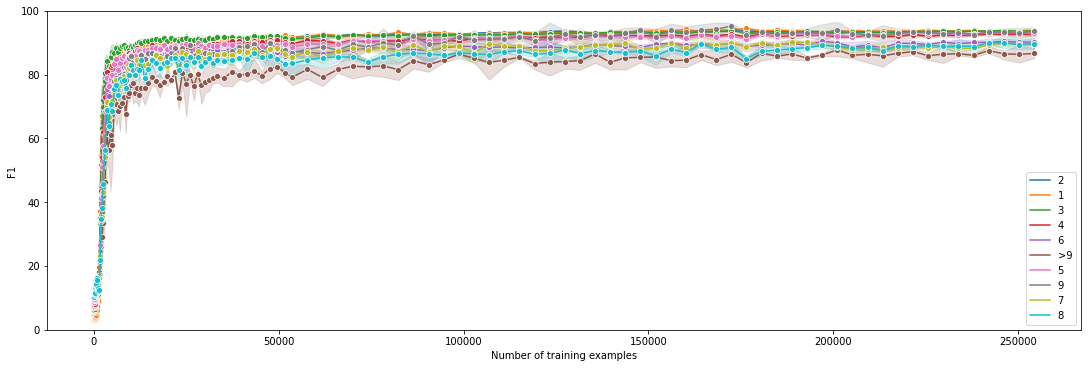

In [13]:
fig = plt.figure(constrained_layout=True, figsize=(15, 5))
gs = fig.add_gridspec(1, 2)

# By category
ax1 = fig.add_subplot(gs[0, :])
ax1.set_ylabel('F1')
ax1.set_xlabel('Number of training examples')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='f1', x='num_examples', hue='answer_mode_length_bin', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

plt.show()

### Initial checkpoints

In [14]:
metrics_by_cat_subset = metrics_by_cat[metrics_by_cat['num_examples'] < 5000]

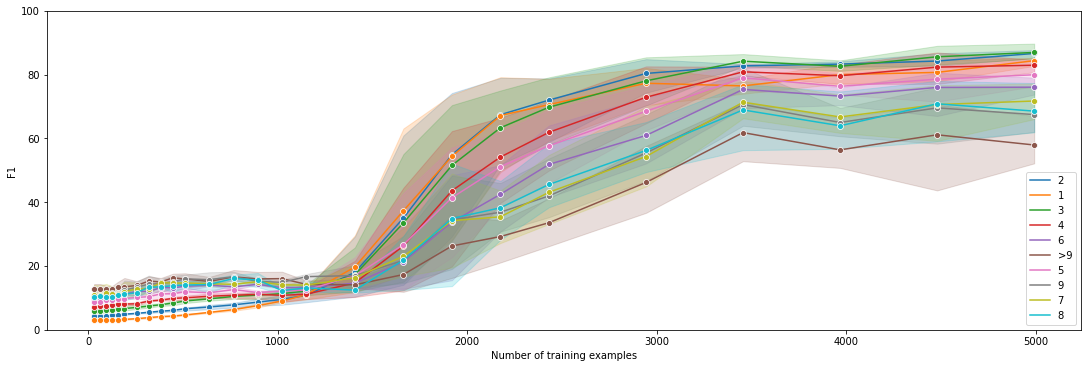

In [15]:
fig = plt.figure(constrained_layout=True, figsize=(15, 5))
gs = fig.add_gridspec(1, 2)

# By category
ax1 = fig.add_subplot(gs[0, :])
ax1.set_ylabel('F1')
ax1.set_xlabel('Number of training examples')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='f1', x='num_examples', hue='answer_mode_length_bin', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

plt.show()

## Context length

In [16]:
metrics_by_cat = pd.DataFrame()

seeds = [28, 29, 30]
filepaths=[
    'data/processed/metrics_by_context_length_bin-albert-xlarge-v2-squadv1-wu=100-lr=3e5-bs=32-msl=384-seed=28.csv',
    'data/processed/metrics_by_context_length_bin-albert-xlarge-v2-squadv1-wu=100-lr=3e5-bs=32-msl=384-seed=29.csv',
    'data/processed/metrics_by_context_length_bin-albert-xlarge-v2-squadv1-wu=100-lr=3e5-bs=32-msl=384-seed=30.csv'
]

for seed, fp in zip(seeds, filepaths):
    df = pd.read_csv(fp)
    df['seed'] = seed
    metrics_by_cat = metrics_by_cat.append(df)
    
metrics_by_cat['num_examples'] = metrics_by_cat['checkpoint'] * BATCH_SIZE

In [17]:
print(metrics_by_cat.shape)
metrics_by_cat.head()

(2160, 16)


,exact,f1,total,HasAns_exact,HasAns_f1,HasAns_total,best_exact,best_exact_thresh,best_f1,best_f1_thresh,context_length_bin,checkpoint,overall_f1,overall_exact,seed,num_examples
0,0.119454,4.972927,5860,0.119454,4.972927,5860,0.119454,0.0,4.972927,0.0,100-200,1,4.923171,0.094607,28,32
1,0.025484,4.818823,3924,0.025484,4.818823,3924,0.025484,0.0,4.818823,0.0,0-100,1,4.923171,0.094607,28,32
2,0.316957,5.144623,631,0.316957,5.144623,631,0.316957,0.0,5.144623,0.0,200-300,1,4.923171,0.094607,28,32
3,0.000000,4.855292,106,0.000000,4.855292,106,0.000000,0.0,4.855292,0.0,300-400,1,4.923171,0.094607,28,32
4,0.000000,2.990403,23,0.000000,2.990403,23,0.000000,0.0,2.990403,0.0,>500,1,4.923171,0.094607,28,32


In [18]:
np.sort(metrics_by_cat['context_length_bin'].unique())

array(['0-100', '100-200', '200-300', '300-400', '400-500', '>500'],
      dtype=object)

### Full checkpoints

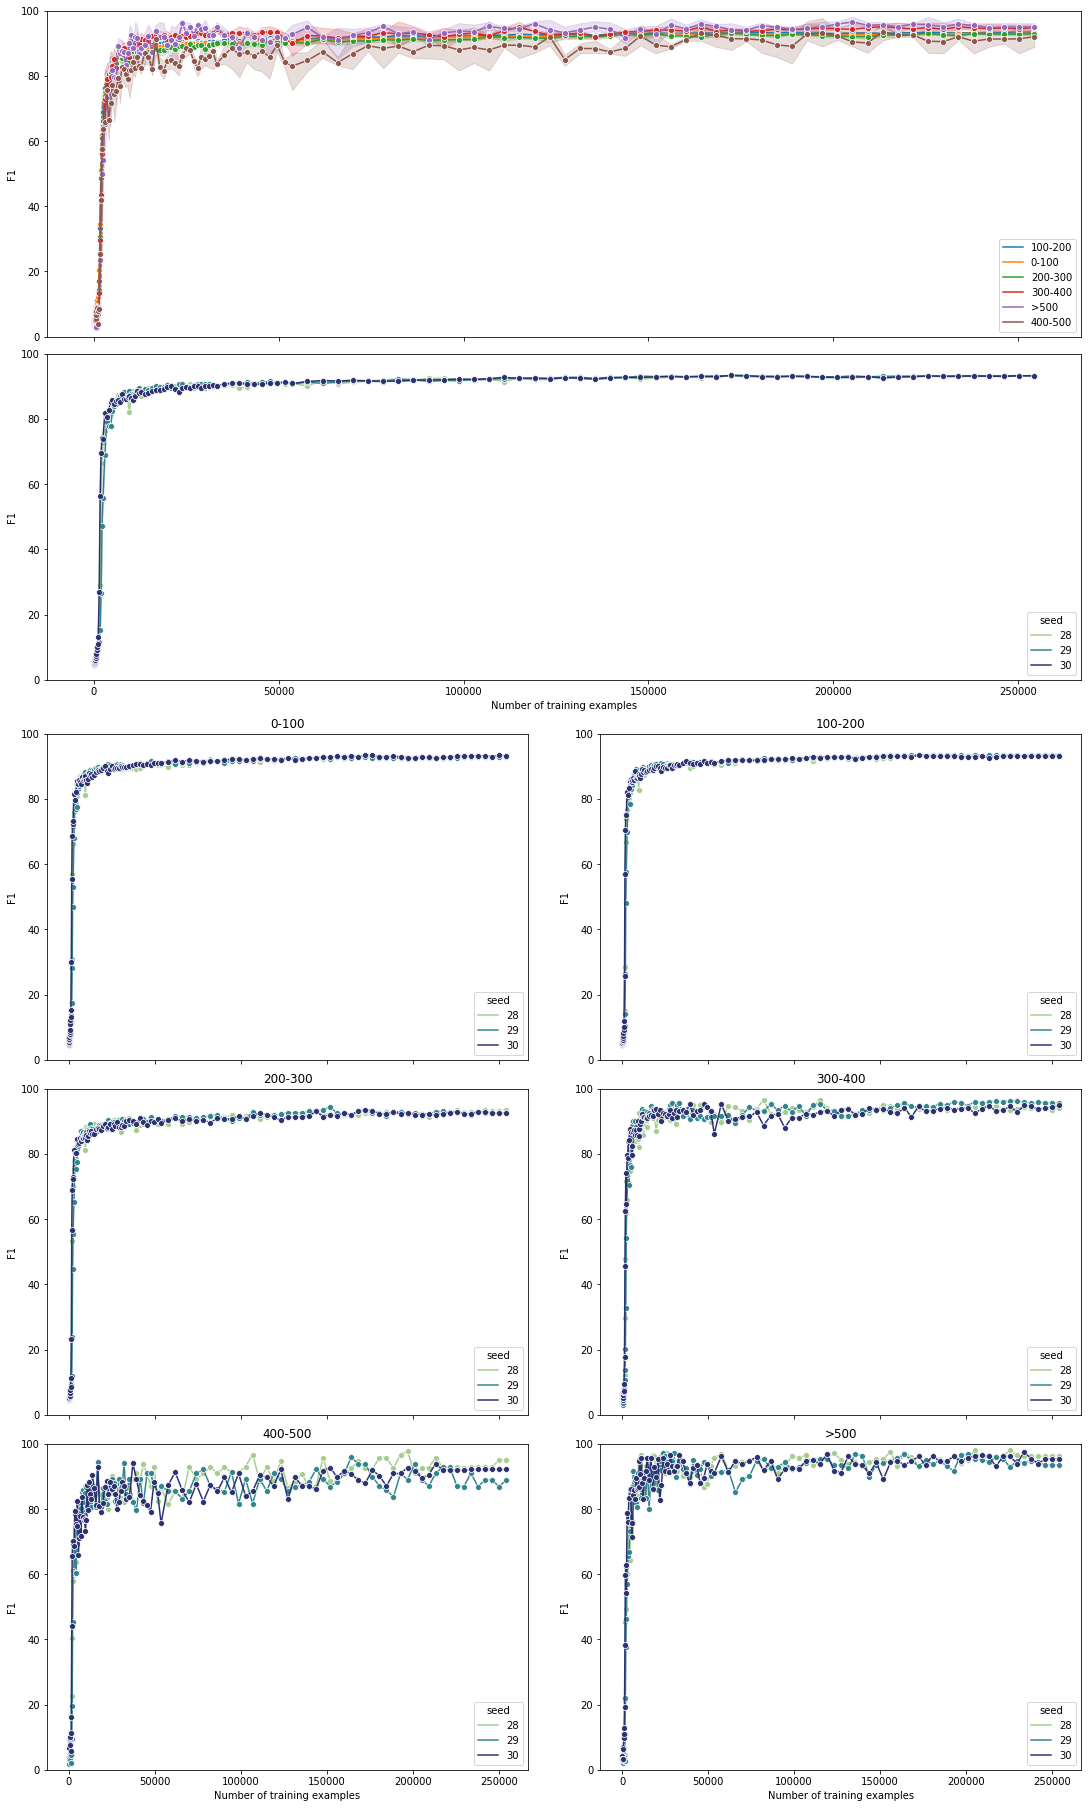

In [19]:
fig = plt.figure(constrained_layout=True, figsize=(15, 25))
gs = fig.add_gridspec(5, 2)

# Overall (all examples) by seed
ax2 = fig.add_subplot(gs[1, :])
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('F1')
ax2.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='overall_f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax2)
ax2.legend(title='seed', loc='lower right')

# By category
ax1 = fig.add_subplot(gs[0, :], sharex=ax2, sharey=ax2)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('F1')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='f1', x='num_examples', hue='context_length_bin', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

# '400-500'
ax9 = fig.add_subplot(gs[4, 0])
ax9.set_xlabel('Number of training examples')
ax9.set_ylabel('F1')
ax9.set_title('400-500')
ax9.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['context_length_bin'] == '400-500'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax9)
ax9.legend(title='seed', loc='lower right')

# '0-100'
ax3 = fig.add_subplot(gs[2, 0], sharex=ax9, sharey=ax9)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.set_ylabel('F1')
ax3.set_title('0-100')
ax3.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['context_length_bin'] == '0-100'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax3)
ax3.legend(title='seed', loc='lower right')

# '200-300'
ax5 = fig.add_subplot(gs[3, 0], sharex=ax9, sharey=ax9)
plt.setp(ax5.get_xticklabels(), visible=False)
ax5.set_ylabel('F1')
ax5.set_title('200-300')
ax5.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['context_length_bin'] == '200-300'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax5)
ax5.legend(title='seed', loc='lower right')

# '>500'
ax10 = fig.add_subplot(gs[4, 1])
ax10.set_xlabel('Number of training examples')
ax10.set_ylabel('F1')
ax10.set_title('>500')
ax10.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['context_length_bin'] == '>500'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax10)
ax10.legend(title='seed', loc='lower right')

# '100-200'
ax4 = fig.add_subplot(gs[2, 1], sharex=ax10, sharey=ax10)
plt.setp(ax4.get_xticklabels(), visible=False)
ax4.set_ylabel('F1')
ax4.set_title('100-200')
ax4.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['context_length_bin'] == '100-200'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax4)
ax4.legend(title='seed', loc='lower right')

# '300-400'
ax6 = fig.add_subplot(gs[3, 1], sharex=ax10, sharey=ax10)
plt.setp(ax6.get_xticklabels(), visible=False)
ax6.set_ylabel('F1')
ax6.set_title('300-400')
ax6.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['context_length_bin'] == '300-400'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax6)
ax6.legend(title='seed', loc='lower right')

plt.show()

### Initial checkpoints

In [20]:
metrics_by_cat_subset = metrics_by_cat[metrics_by_cat['num_examples'] < 25000]

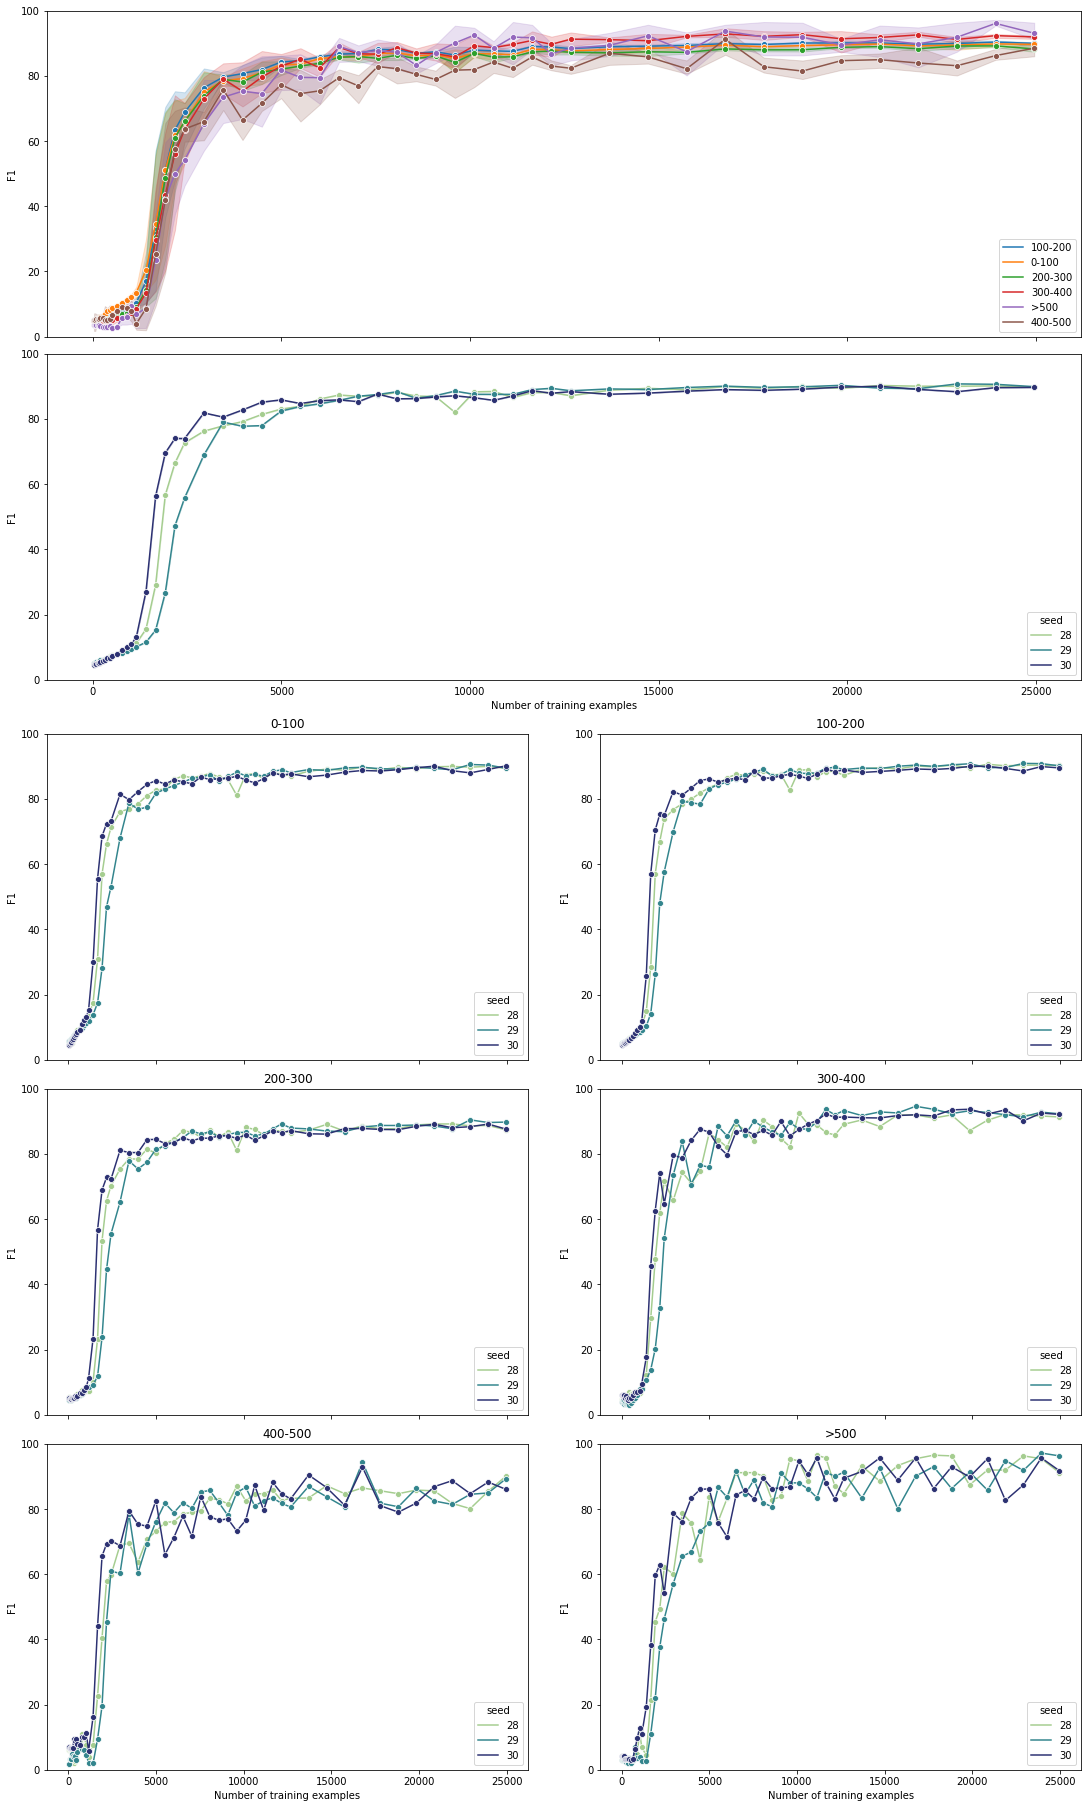

In [21]:
fig = plt.figure(constrained_layout=True, figsize=(15, 25))
gs = fig.add_gridspec(5, 2)

# Overall (all examples) by seed
ax2 = fig.add_subplot(gs[1, :])
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('F1')
ax2.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='overall_f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax2)
ax2.legend(title='seed', loc='lower right')

# By category
ax1 = fig.add_subplot(gs[0, :], sharex=ax2, sharey=ax2)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('F1')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='f1', x='num_examples', hue='context_length_bin', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

# '400-500'
ax9 = fig.add_subplot(gs[4, 0])
ax9.set_xlabel('Number of training examples')
ax9.set_ylabel('F1')
ax9.set_title('400-500')
ax9.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['context_length_bin'] == '400-500'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax9)
ax9.legend(title='seed', loc='lower right')

# '0-100'
ax3 = fig.add_subplot(gs[2, 0], sharex=ax9, sharey=ax9)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.set_ylabel('F1')
ax3.set_title('0-100')
ax3.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['context_length_bin'] == '0-100'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax3)
ax3.legend(title='seed', loc='lower right')

# '200-300'
ax5 = fig.add_subplot(gs[3, 0], sharex=ax9, sharey=ax9)
plt.setp(ax5.get_xticklabels(), visible=False)
ax5.set_ylabel('F1')
ax5.set_title('200-300')
ax5.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['context_length_bin'] == '200-300'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax5)
ax5.legend(title='seed', loc='lower right')

# '>500'
ax10 = fig.add_subplot(gs[4, 1])
ax10.set_xlabel('Number of training examples')
ax10.set_ylabel('F1')
ax10.set_title('>500')
ax10.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['context_length_bin'] == '>500'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax10)
ax10.legend(title='seed', loc='lower right')

# '100-200'
ax4 = fig.add_subplot(gs[2, 1], sharex=ax10, sharey=ax10)
plt.setp(ax4.get_xticklabels(), visible=False)
ax4.set_ylabel('F1')
ax4.set_title('100-200')
ax4.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['context_length_bin'] == '100-200'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax4)
ax4.legend(title='seed', loc='lower right')

# '300-400'
ax6 = fig.add_subplot(gs[3, 1], sharex=ax10, sharey=ax10)
plt.setp(ax6.get_xticklabels(), visible=False)
ax6.set_ylabel('F1')
ax6.set_title('300-400')
ax6.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['context_length_bin'] == '300-400'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax6)
ax6.legend(title='seed', loc='lower right')

plt.show()

## Question length

In [22]:
metrics_by_cat = pd.DataFrame()

seeds = [28, 29, 30]
filepaths=[
    'data/processed/metrics_by_question_length_bin-albert-xlarge-v2-squadv1-wu=100-lr=3e5-bs=32-msl=384-seed=28.csv',
    'data/processed/metrics_by_question_length_bin-albert-xlarge-v2-squadv1-wu=100-lr=3e5-bs=32-msl=384-seed=29.csv',
    'data/processed/metrics_by_question_length_bin-albert-xlarge-v2-squadv1-wu=100-lr=3e5-bs=32-msl=384-seed=30.csv'
]

for seed, fp in zip(seeds, filepaths):
    df = pd.read_csv(fp)
    df['seed'] = seed
    metrics_by_cat = metrics_by_cat.append(df)
    
metrics_by_cat['num_examples'] = metrics_by_cat['checkpoint'] * BATCH_SIZE

In [23]:
print(metrics_by_cat.shape)
metrics_by_cat.head()

(2160, 16)


,exact,f1,total,HasAns_exact,HasAns_f1,HasAns_total,best_exact,best_exact_thresh,best_f1,best_f1_thresh,question_length_bin,checkpoint,overall_f1,overall_exact,seed,num_examples
0,0.160571,5.114416,5605,0.160571,5.114416,5605,0.160571,0.0,5.114416,0.0,5-10,1,4.923171,0.094607,28,32
1,0.000000,4.713350,3450,0.000000,4.713350,3450,0.000000,0.0,4.713350,0.0,10-15,1,4.923171,0.094607,28,32
2,0.153610,5.567918,651,0.153610,5.567918,651,0.153610,0.0,5.567918,0.0,0-5,1,4.923171,0.094607,28,32
3,0.000000,3.950802,744,0.000000,3.950802,744,0.000000,0.0,3.950802,0.0,15-20,1,4.923171,0.094607,28,32
4,0.000000,4.429288,102,0.000000,4.429288,102,0.000000,0.0,4.429288,0.0,20-25,1,4.923171,0.094607,28,32


In [24]:
metrics_by_cat['question_length_bin'].unique()

array(['5-10', '10-15', '0-5', '15-20', '20-25', '>25'], dtype=object)

### Full checkpoints

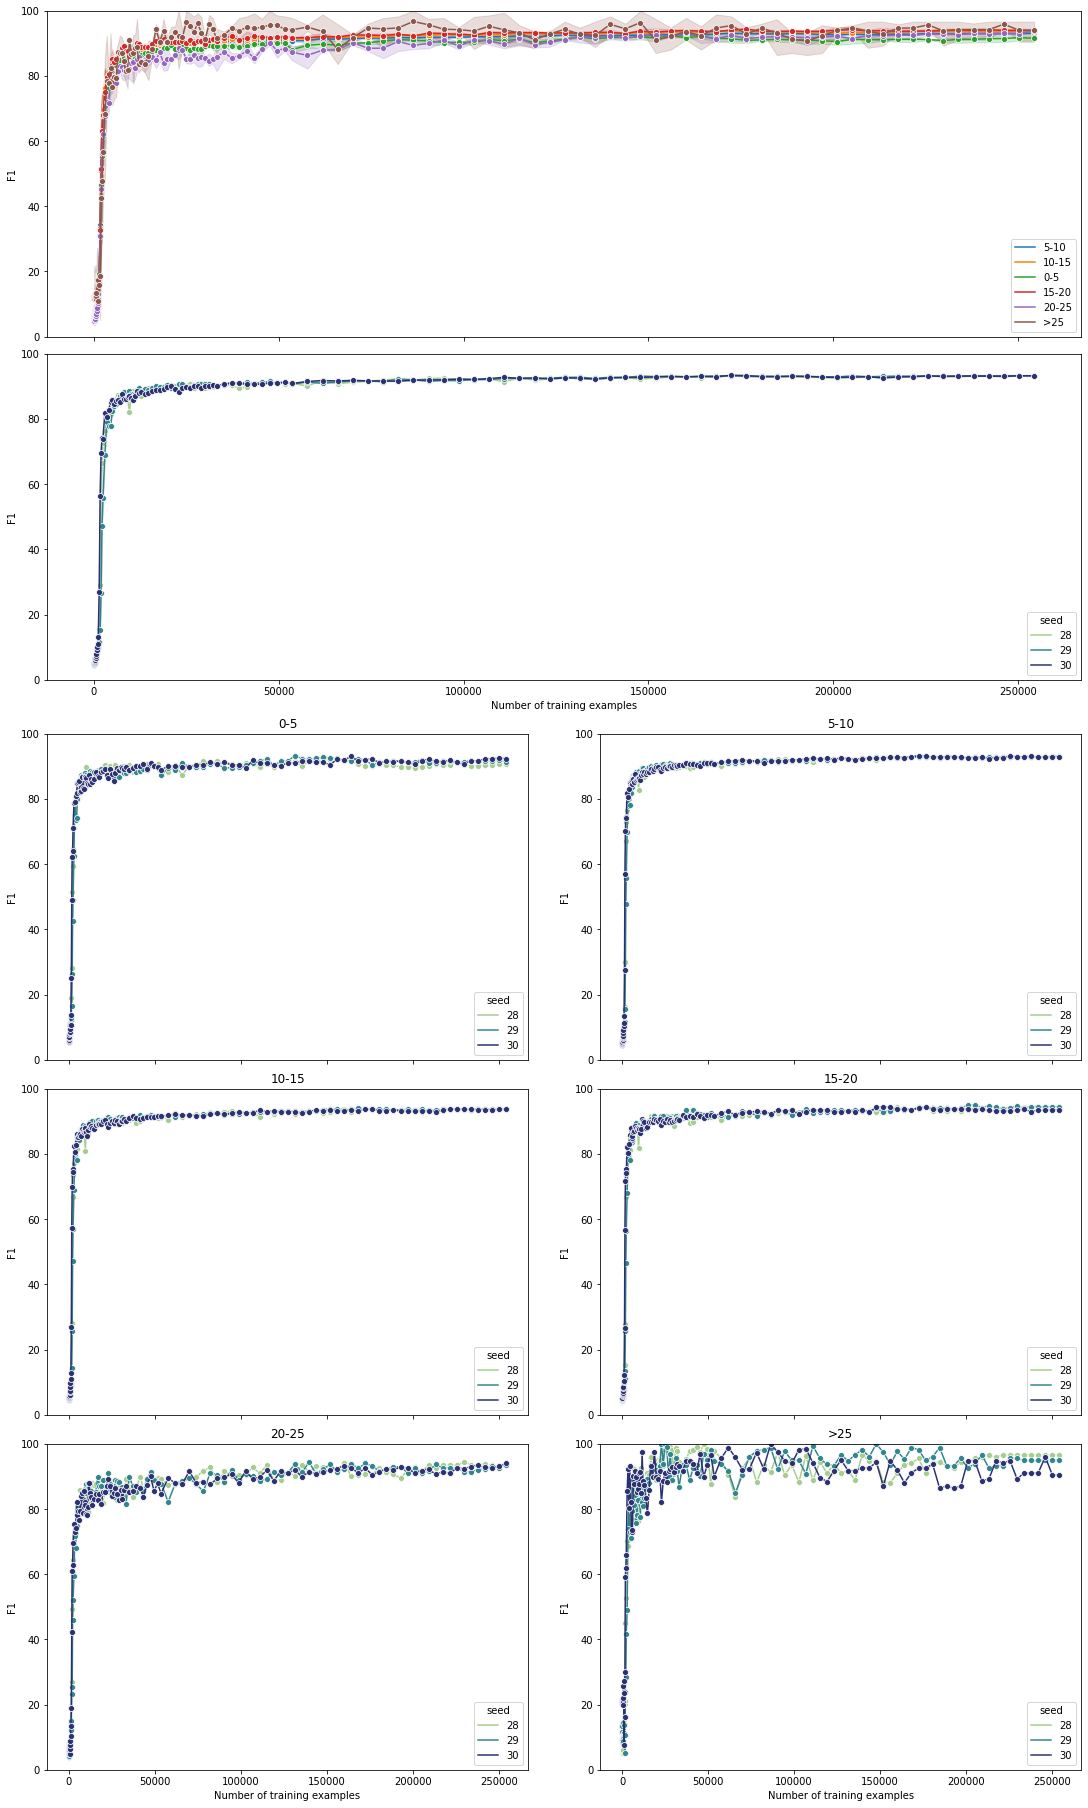

In [25]:
fig = plt.figure(constrained_layout=True, figsize=(15, 25))
gs = fig.add_gridspec(5, 2)

# Overall (all examples) by seed
ax2 = fig.add_subplot(gs[1, :])
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('F1')
ax2.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='overall_f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax2)
ax2.legend(title='seed', loc='lower right')

# By category
ax1 = fig.add_subplot(gs[0, :], sharex=ax2, sharey=ax2)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('F1')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='f1', x='num_examples', hue='question_length_bin', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

# '20-25'
ax9 = fig.add_subplot(gs[4, 0])
ax9.set_xlabel('Number of training examples')
ax9.set_ylabel('F1')
ax9.set_title('20-25')
ax9.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['question_length_bin'] == '20-25'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax9)
ax9.legend(title='seed', loc='lower right')

# '0-5'
ax3 = fig.add_subplot(gs[2, 0], sharex=ax9, sharey=ax9)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.set_ylabel('F1')
ax3.set_title('0-5')
ax3.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['question_length_bin'] == '0-5'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax3)
ax3.legend(title='seed', loc='lower right')

# '10-15'
ax5 = fig.add_subplot(gs[3, 0], sharex=ax9, sharey=ax9)
plt.setp(ax5.get_xticklabels(), visible=False)
ax5.set_ylabel('F1')
ax5.set_title('10-15')
ax5.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['question_length_bin'] == '10-15'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax5)
ax5.legend(title='seed', loc='lower right')

# '>25'
ax10 = fig.add_subplot(gs[4, 1])
ax10.set_xlabel('Number of training examples')
ax10.set_ylabel('F1')
ax10.set_title('>25')
ax10.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['question_length_bin'] == '>25'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax10)
ax10.legend(title='seed', loc='lower right')

# '5-10'
ax4 = fig.add_subplot(gs[2, 1], sharex=ax10, sharey=ax10)
plt.setp(ax4.get_xticklabels(), visible=False)
ax4.set_ylabel('F1')
ax4.set_title('5-10')
ax4.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['question_length_bin'] == '5-10'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax4)
ax4.legend(title='seed', loc='lower right')

# '15-20'
ax6 = fig.add_subplot(gs[3, 1], sharex=ax10, sharey=ax10)
plt.setp(ax6.get_xticklabels(), visible=False)
ax6.set_ylabel('F1')
ax6.set_title('15-20')
ax6.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat[metrics_by_cat['question_length_bin'] == '15-20'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax6)
ax6.legend(title='seed', loc='lower right')

plt.show()

### Initial checkpoints

In [26]:
metrics_by_cat_subset = metrics_by_cat[metrics_by_cat['num_examples'] < 25000]

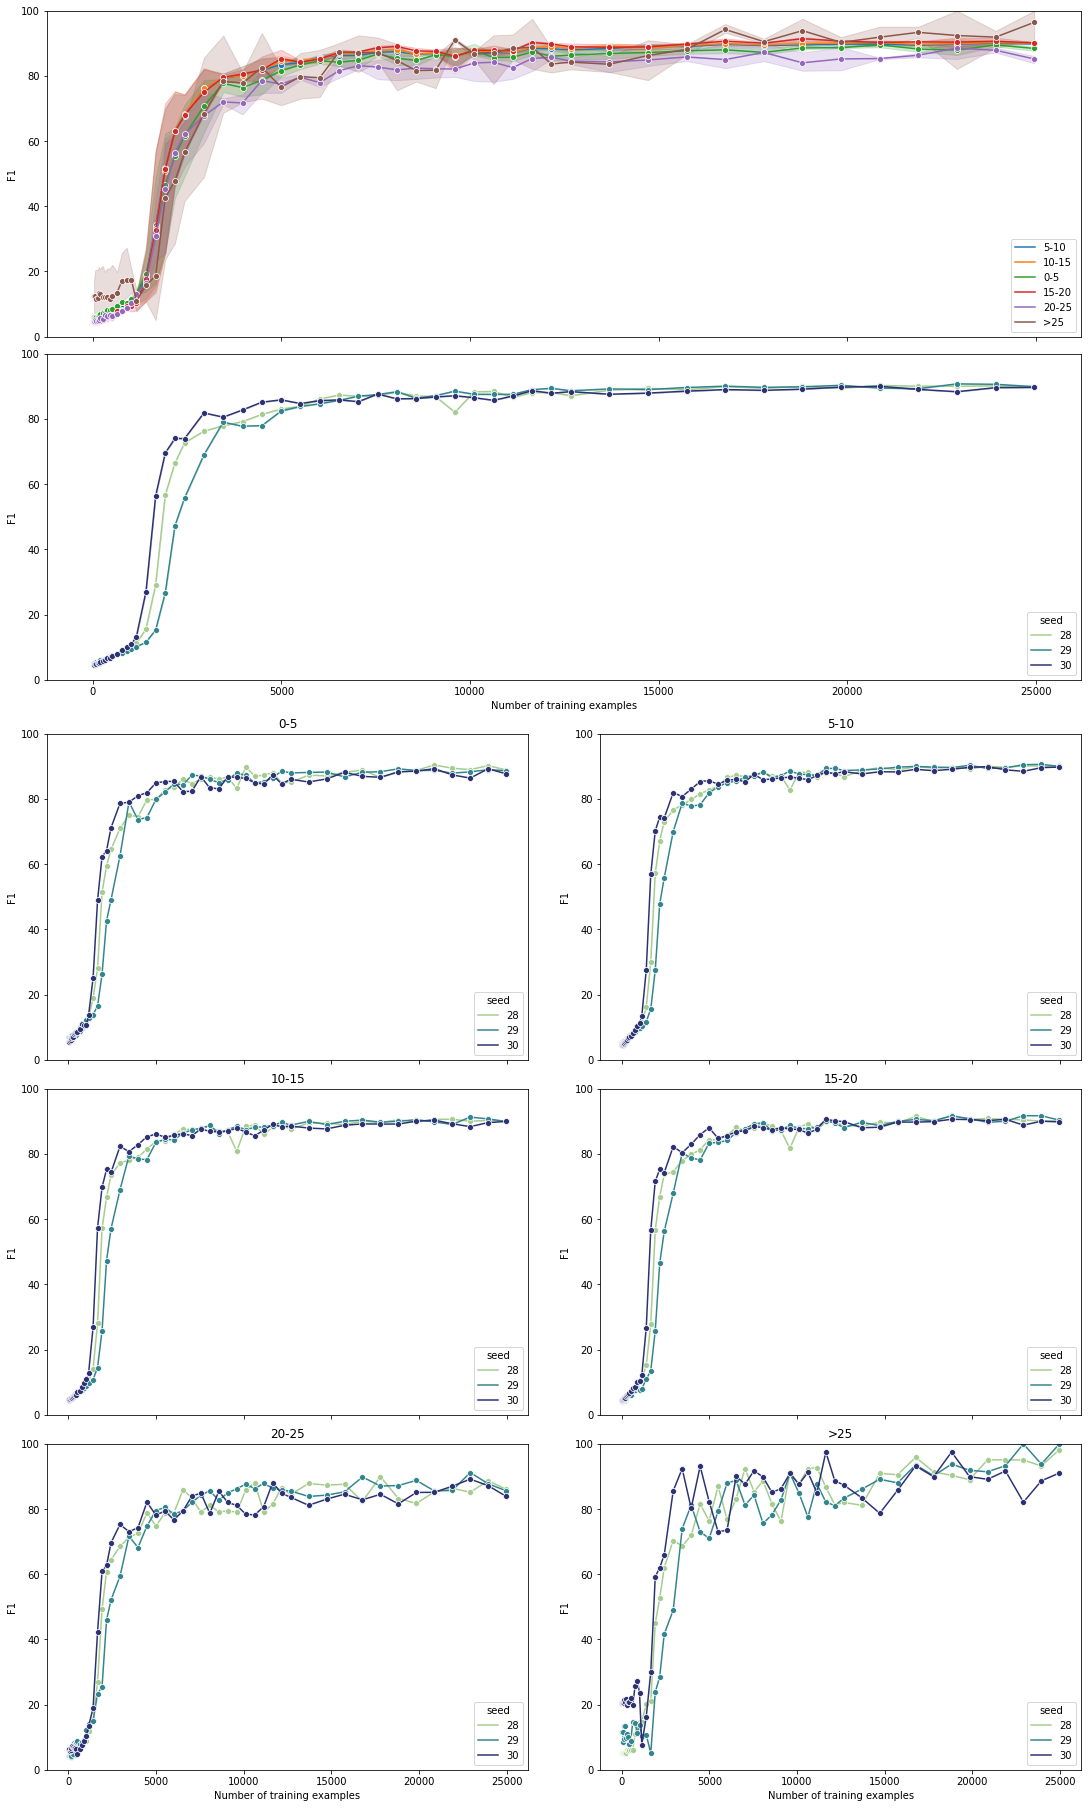

In [27]:
fig = plt.figure(constrained_layout=True, figsize=(15, 25))
gs = fig.add_gridspec(5, 2)

# Overall (all examples) by seed
ax2 = fig.add_subplot(gs[1, :])
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('F1')
ax2.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='overall_f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax2)
ax2.legend(title='seed', loc='lower right')

# By category
ax1 = fig.add_subplot(gs[0, :], sharex=ax2, sharey=ax2)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('F1')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='f1', x='num_examples', hue='question_length_bin', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

# '20-25'
ax9 = fig.add_subplot(gs[4, 0])
ax9.set_xlabel('Number of training examples')
ax9.set_ylabel('F1')
ax9.set_title('20-25')
ax9.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['question_length_bin'] == '20-25'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax9)
ax9.legend(title='seed', loc='lower right')

# '0-5'
ax3 = fig.add_subplot(gs[2, 0], sharex=ax9, sharey=ax9)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.set_ylabel('F1')
ax3.set_title('0-5')
ax3.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['question_length_bin'] == '0-5'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax3)
ax3.legend(title='seed', loc='lower right')

# '10-15'
ax5 = fig.add_subplot(gs[3, 0], sharex=ax9, sharey=ax9)
plt.setp(ax5.get_xticklabels(), visible=False)
ax5.set_ylabel('F1')
ax5.set_title('10-15')
ax5.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['question_length_bin'] == '10-15'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax5)
ax5.legend(title='seed', loc='lower right')

# '>25'
ax10 = fig.add_subplot(gs[4, 1])
ax10.set_xlabel('Number of training examples')
ax10.set_ylabel('F1')
ax10.set_title('>25')
ax10.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['question_length_bin'] == '>25'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax10)
ax10.legend(title='seed', loc='lower right')

# '5-10'
ax4 = fig.add_subplot(gs[2, 1], sharex=ax10, sharey=ax10)
plt.setp(ax4.get_xticklabels(), visible=False)
ax4.set_ylabel('F1')
ax4.set_title('5-10')
ax4.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['question_length_bin'] == '5-10'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax4)
ax4.legend(title='seed', loc='lower right')

# '15-20'
ax6 = fig.add_subplot(gs[3, 1], sharex=ax10, sharey=ax10)
plt.setp(ax6.get_xticklabels(), visible=False)
ax6.set_ylabel('F1')
ax6.set_title('15-20')
ax6.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset[metrics_by_cat_subset['question_length_bin'] == '15-20'], y='f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax6)
ax6.legend(title='seed', loc='lower right')

plt.show()

## Answer type

In [28]:
metrics_by_cat = pd.DataFrame()

seeds = [28, 29, 30]
filepaths=[
    'data/processed/metrics_by_answer_type-albert-xlarge-v2-squadv1-wu=100-lr=3e5-bs=32-msl=384-seed=28.csv',
    'data/processed/metrics_by_answer_type-albert-xlarge-v2-squadv1-wu=100-lr=3e5-bs=32-msl=384-seed=29.csv',
    'data/processed/metrics_by_answer_type-albert-xlarge-v2-squadv1-wu=100-lr=3e5-bs=32-msl=384-seed=30.csv'
]

for seed, fp in zip(seeds, filepaths):
    df = pd.read_csv(fp)
    df['seed'] = seed
    metrics_by_cat = metrics_by_cat.append(df)
    
metrics_by_cat['num_examples'] = metrics_by_cat['checkpoint'] * BATCH_SIZE

In [29]:
print(metrics_by_cat.shape)
metrics_by_cat.head()

(3960, 16)


,exact,f1,total,HasAns_exact,HasAns_f1,HasAns_total,best_exact,best_exact_thresh,best_f1,best_f1_thresh,answer_type,checkpoint,overall_f1,overall_exact,seed,num_examples
0,0.096339,5.338052,1038,0.096339,5.338052,1038,0.096339,0.0,5.338052,0.0,Organisation,1,4.923171,0.094607,28,32
1,0.063553,4.911354,3147,0.063553,4.911354,3147,0.063553,0.0,4.911354,0.0,Common Noun Phrase,1,4.923171,0.094607,28,32
2,0.552486,6.181847,543,0.552486,6.181847,543,0.552486,0.0,6.181847,0.0,Date,1,4.923171,0.094607,28,32
3,0.000000,4.486479,1175,0.000000,4.486479,1175,0.000000,0.0,4.486479,0.0,Other Entity,1,4.923171,0.094607,28,32
4,0.000000,6.146708,549,0.000000,6.146708,549,0.000000,0.0,6.146708,0.0,Location,1,4.923171,0.094607,28,32


In [33]:
metrics_by_cat['answer_type'].unique()

array(['Organisation', 'Common Noun Phrase', 'Date', 'Other Entity',
       'Location', 'Other Numeric', 'Person', 'Other', 'Adjective Phrase',
       'Verb Phrase', 'Clause'], dtype=object)

### Full checkpoints

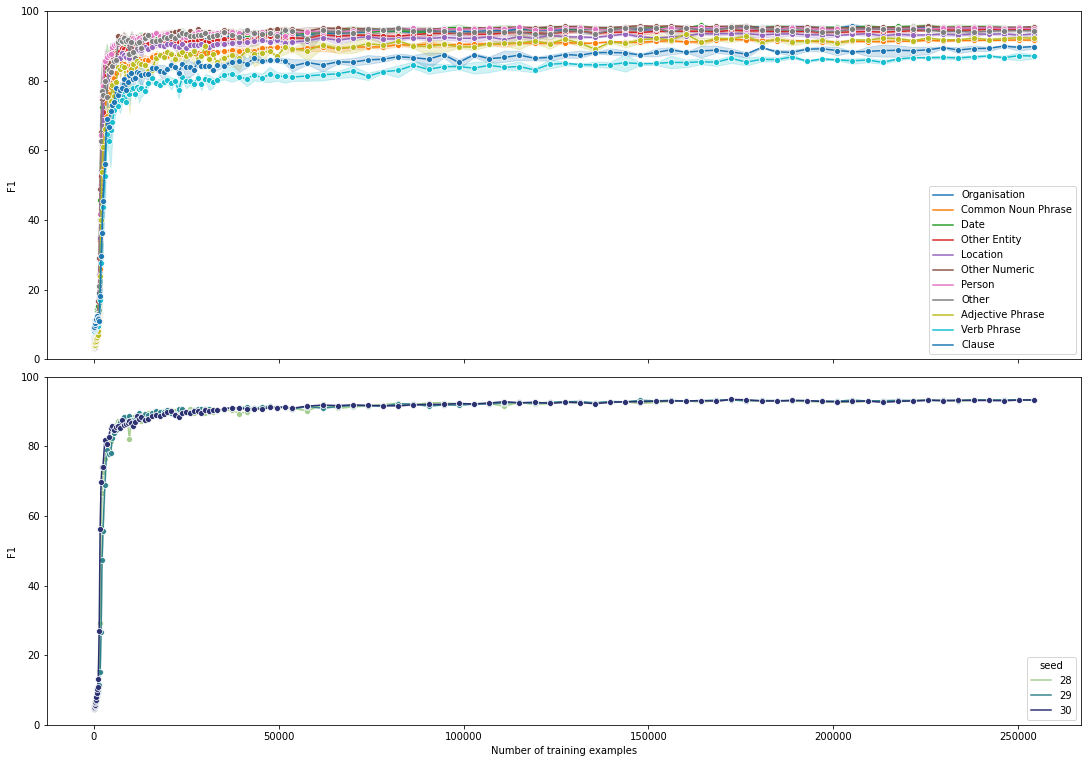

In [31]:
fig = plt.figure(constrained_layout=True, figsize=(15, 25))
gs = fig.add_gridspec(5, 2)

# Overall (all examples) by seed
ax2 = fig.add_subplot(gs[1, :])
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('F1')
ax2.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='overall_f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax2)
ax2.legend(title='seed', loc='lower right')

# By category
ax1 = fig.add_subplot(gs[0, :], sharex=ax2, sharey=ax2)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('F1')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat, y='f1', x='num_examples', hue='answer_type', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

plt.show()

### Initial checkpoints

In [40]:
metrics_by_cat_subset = metrics_by_cat[metrics_by_cat['num_examples'] < 10000]

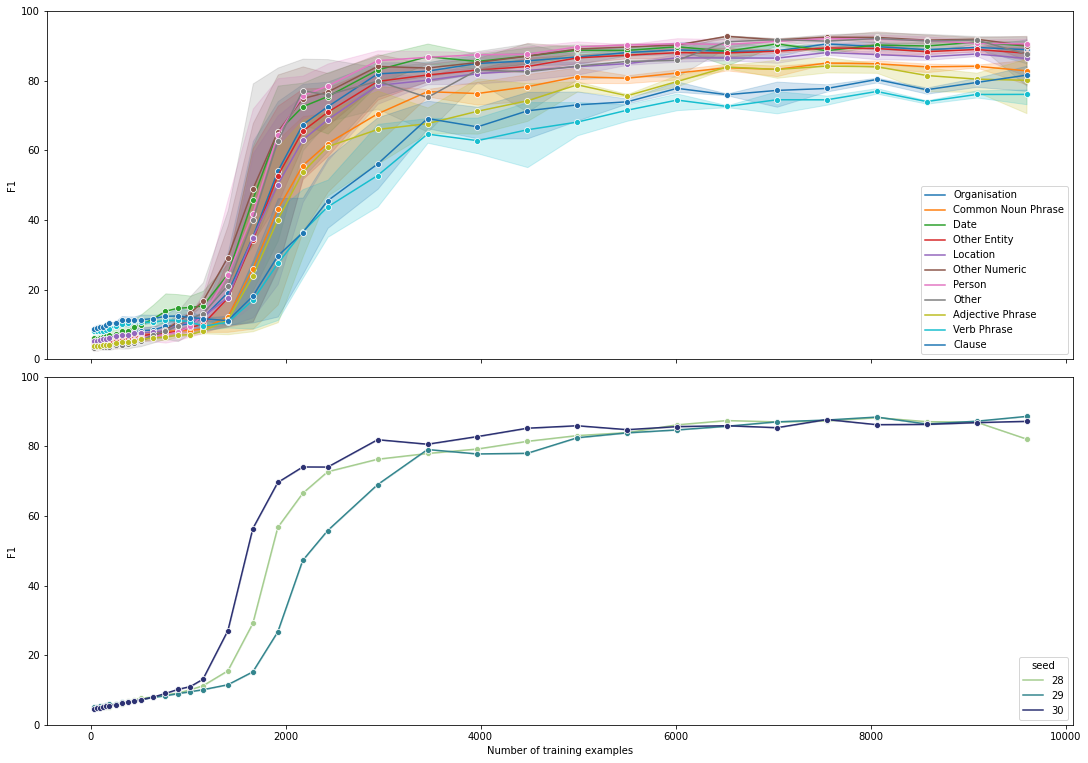

In [41]:
fig = plt.figure(constrained_layout=True, figsize=(15, 25))
gs = fig.add_gridspec(5, 2)

# Overall (all examples) by seed
ax2 = fig.add_subplot(gs[1, :])
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('F1')
ax2.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='overall_f1', x='num_examples', hue='seed', marker='o', palette='crest', ax=ax2)
ax2.legend(title='seed', loc='lower right')

# By category
ax1 = fig.add_subplot(gs[0, :], sharex=ax2, sharey=ax2)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('F1')
ax1.set_ylim(0, 100)
sns.lineplot(data=metrics_by_cat_subset, y='f1', x='num_examples', hue='answer_type', marker='o', palette='tab10', ax=ax1)
ax1.legend(loc='lower right')

plt.show()